In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    precision_recall_curve, RocCurveDisplay)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

import pickle


In [2]:
df1=pd.read_csv("C:/Users/user/Desktop/CapstoneProject/MultipleDiseaseApp/indian_liver_patient - indian_liver_patient.csv")

In [3]:
df1.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
df1.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [6]:
df1['Albumin_and_Globulin_Ratio'].fillna(df1['Albumin_and_Globulin_Ratio'].mean(), inplace=True)
df1.isnull().sum()

C:\Users\user\AppData\Local\Temp\ipykernel_17976\1113316797.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Albumin_and_Globulin_Ratio'].fillna(df1['Albumin_and_Globulin_Ratio'].mean(), inplace=True)


Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
df1['Gender'] = le.fit_transform(df1['Gender'])

In [8]:
scaler = StandardScaler()
numerical_columns = df1.drop('Dataset', axis=1).columns  # Exclude target
df1[numerical_columns] = scaler.fit_transform(df1[numerical_columns])

In [9]:
features = [
    'Age',
    'Total_Bilirubin',
    'Direct_Bilirubin',
    'Alkaline_Phosphotase',
    'Alamine_Aminotransferase',
    'Aspartate_Aminotransferase',
    'Total_Protiens',
    'Albumin',
    'Albumin_and_Globulin_Ratio'
]

In [10]:
X = df1[features].fillna(df1[features].mean())
y = df1['Dataset'].replace(2, 0)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [14]:
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

In [15]:
print("🔍 Evaluation Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=["No Disease", "Liver Disease"]))

🔍 Evaluation Metrics:
Accuracy: 0.717948717948718
Precision: 0.7872340425531915
Recall: 0.8505747126436781
F1-Score: 0.8176795580110497
ROC-AUC: 0.7729885057471265
Confusion Matrix:
 [[10 20]
 [13 74]]
Classification Report:
                precision    recall  f1-score   support

   No Disease       0.43      0.33      0.38        30
Liver Disease       0.79      0.85      0.82        87

     accuracy                           0.72       117
    macro avg       0.61      0.59      0.60       117
 weighted avg       0.70      0.72      0.70       117



In [16]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)

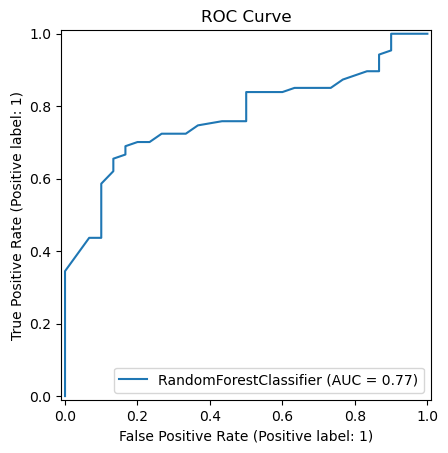

In [18]:
import matplotlib.pyplot as plt
RocCurveDisplay.from_estimator(model, X_test_scaled, y_test)
plt.title("ROC Curve")
plt.show()

In [19]:

from sklearn.metrics import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.43      0.33      0.38        30
           1       0.79      0.85      0.82        87

    accuracy                           0.72       117
   macro avg       0.61      0.59      0.60       117
weighted avg       0.70      0.72      0.70       117



In [20]:
from sklearn.metrics import confusion_matrix
import pandas as pd
crosstab = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
crosstab

Predicted,0,1
Actual,,
0,10,20
1,13,74


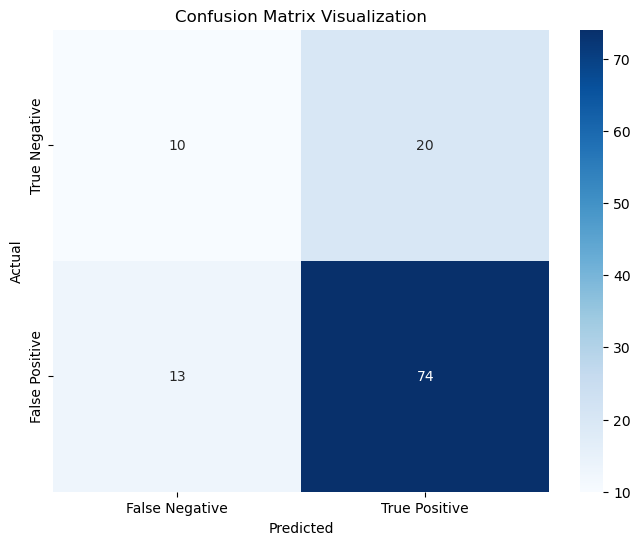

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['False Negative', 'True Positive'], 
            yticklabels=['True Negative', 'False Positive'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Visualization')

# Show the plot
plt.show()

In [22]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=500),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "XGBoost": XGBClassifier(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=4,
        objective="binary:logistic",
        eval_metric="logloss",
        random_state=42
    )
}

results = {}

In [23]:
for name, model in models.items():
    print(f"\n")
    
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='binary', zero_division=0)
    rec  = recall_score(y_test, y_pred, average='binary', zero_division=0)
    f1   = f1_score(y_test, y_pred, average='binary', zero_division=0)
    
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-score : {f1:.4f}")
    
    print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    
    results[name] = acc

print("\nSUMMARY OF ACCURACIES:")
for name, acc in results.items():
    print(f"{name}: {acc:.4f}")



Accuracy : 0.7607
Precision: 0.7864
Recall   : 0.9310
F1-score : 0.8526

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.27      0.36        30
           1       0.79      0.93      0.85        87

    accuracy                           0.76       117
   macro avg       0.68      0.60      0.61       117
weighted avg       0.73      0.76      0.73       117

Confusion Matrix:
 [[ 8 22]
 [ 6 81]]


Accuracy : 0.7521
Precision: 0.8452
Recall   : 0.8161
F1-score : 0.8304

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.57      0.54        30
           1       0.85      0.82      0.83        87

    accuracy                           0.75       117
   macro avg       0.68      0.69      0.69       117
weighted avg       0.76      0.75      0.76       117

Confusion Matrix:
 [[17 13]
 [16 71]]


Accuracy : 0.7094
Precision: 0.7849
Recall   : 0.8391
F1-score : 0.811

In [24]:
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

print(f"\n Best Liver Model: {best_model_name} (Accuracy = {results[best_model_name]:.4f})")

package = {
    "model": best_model,
    "scaler": scaler,
    "feature_names": X.columns.tolist()
}

with open("liver_disease_model.pkl", "wb") as f:
    pickle.dump(package, f)

print(" Model saved as >>> liver_disease_model.pkl")


 Best Liver Model: LogisticRegression (Accuracy = 0.7607)
 Model saved as >>> liver_disease_model.pkl
